In [2]:
%matplotlib inline
import numpy as np
import theano
import matplotlib.pyplot as plt
from theano import tensor as T, function
from IPython import display
import time

In [3]:
noise_var = .5
n_samples = 1000

n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)
x = (x - x.mean()) / x.std()
w, b = np.random.randn(2)

d = w*x+b
y = d + n

In [4]:
X, Y = T.vectors('input', 'desired')
W = theano.shared(.01)
B = theano.shared(0.1)
Z = W*X + B
Cost = ((Y-Z)**2).mean()
params = [W,B]

In [5]:
W.get_value()

array(0.01)

In [6]:
W

<TensorType(float64, scalar)>

In [7]:
updates = ((W, W*2), )
double_w = function([], [], updates=updates)

In [8]:
double_w()
W.get_value()

array(0.02)

In [9]:
lr = 0.1
grads = [T.grad(Cost, p) for p in params]
updates = []
for p, g in zip(params, grads):
    updates.append((p, p - lr * g))
print(updates)

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [10]:
train = function([X,Y], Cost, updates=updates)

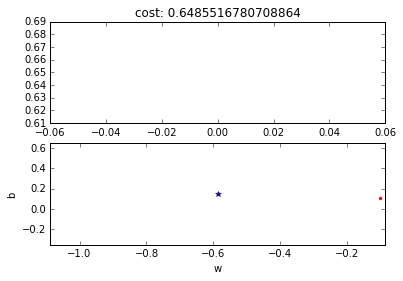

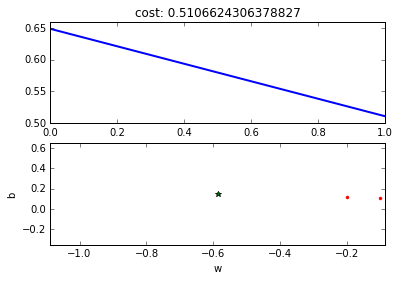

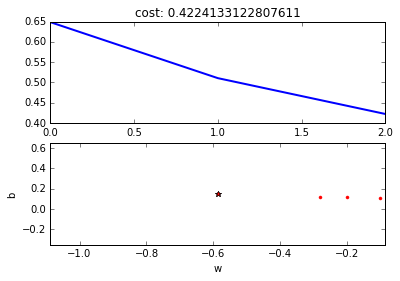

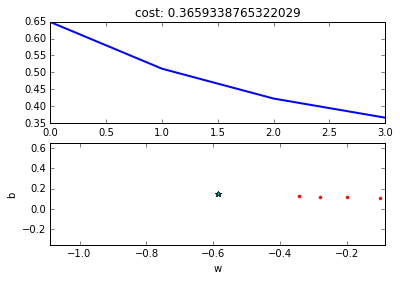

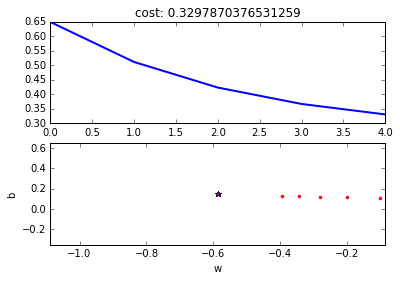

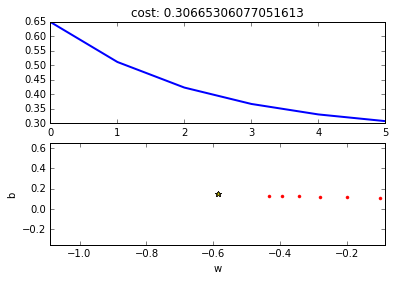

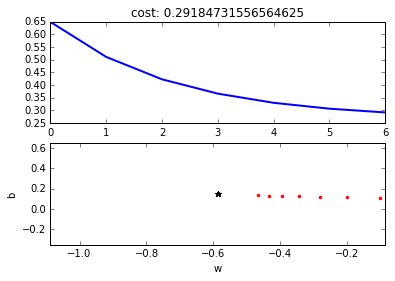

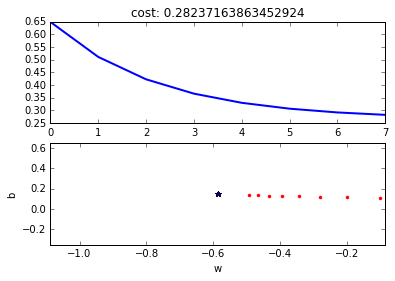

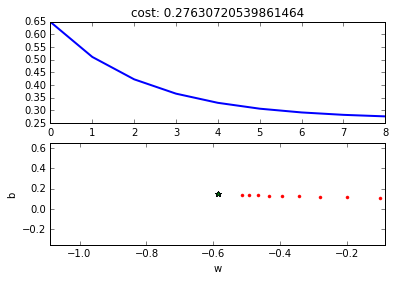

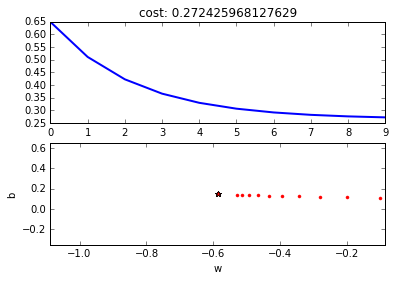

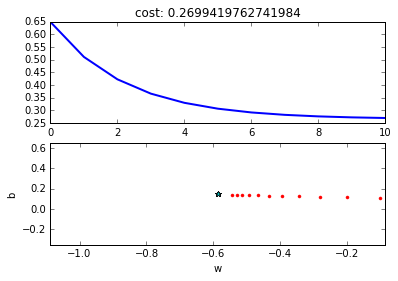

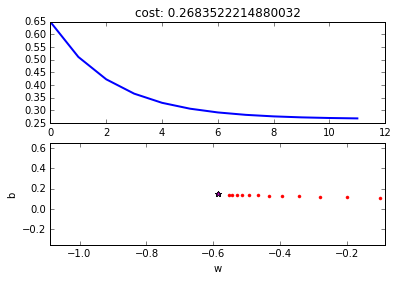

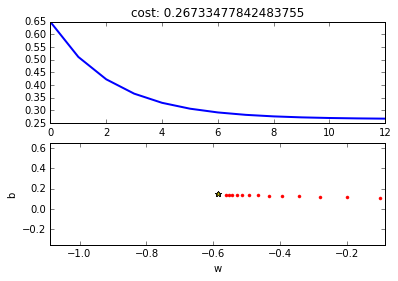

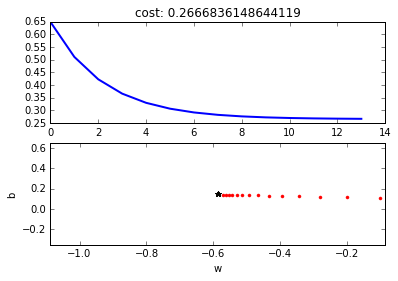

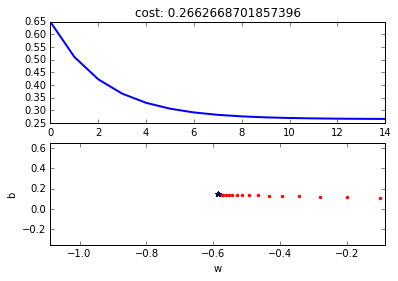

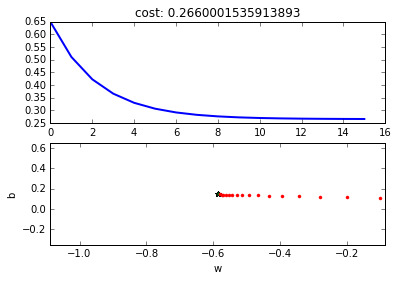

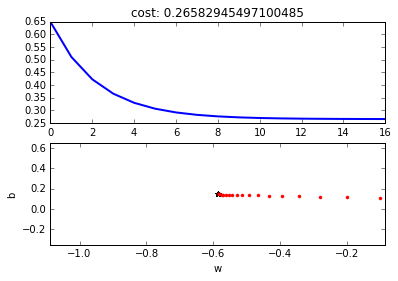

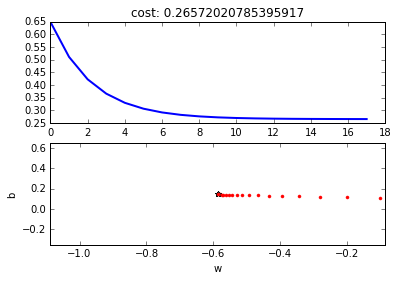

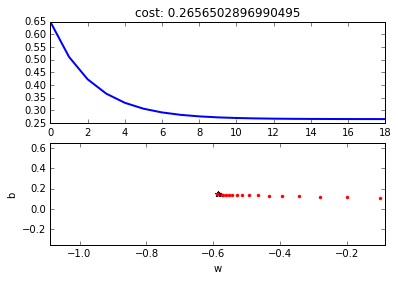

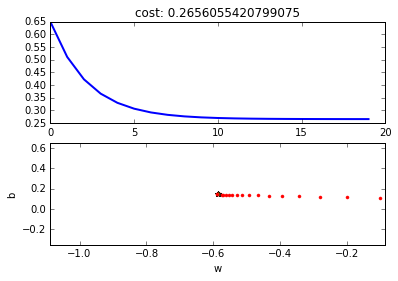

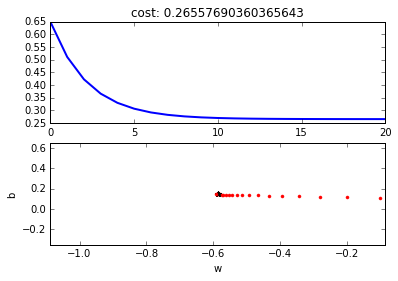

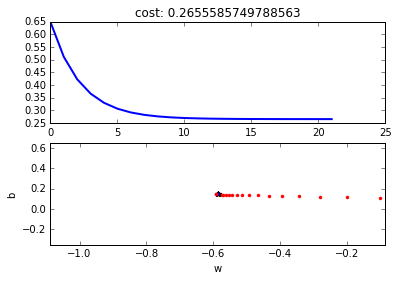

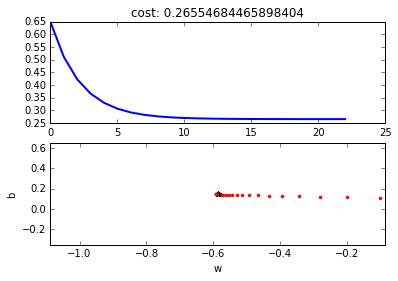

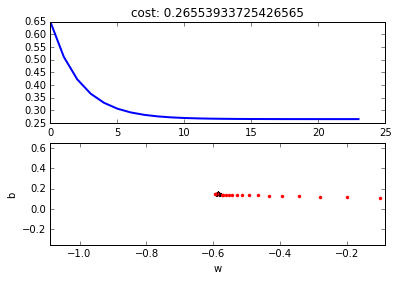

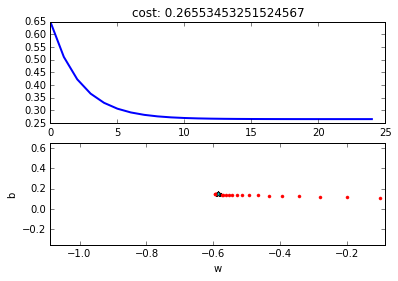

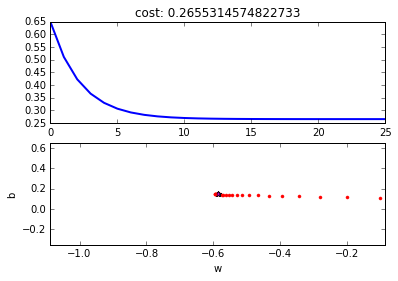

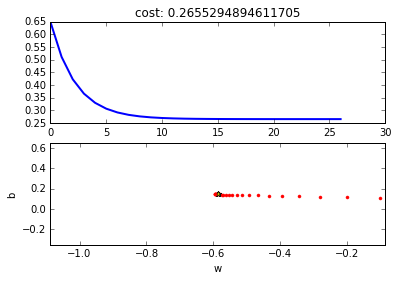

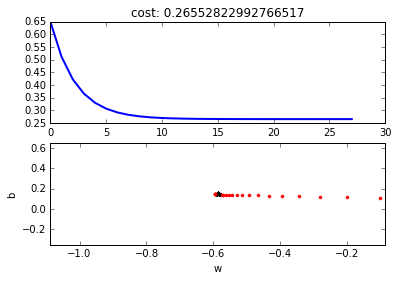

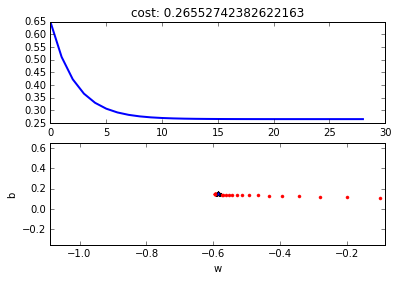

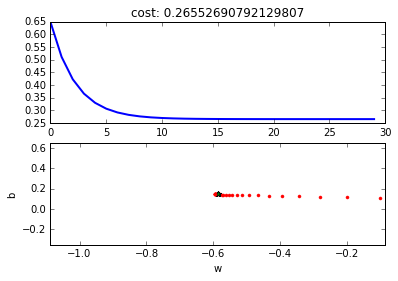

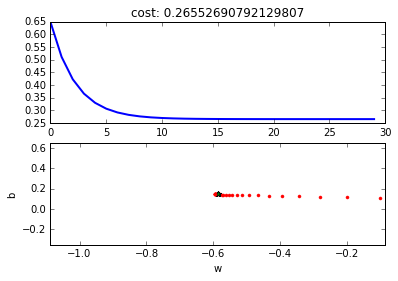

In [11]:
epochs = 30
final_cost = []
for i in range(epochs):
    final_cost.append(train(x,y))
    
    what, bhat = W.get_value(), B.get_value()
    
    plt.subplot(211)
    plt.cla()
    plt.title('cost: {}'.format(final_cost[-1]))
    plt.plot(final_cost, linewidth=2.)
    
    plt.subplot(212)
    plt.plot(w, b, '*', linewidth=2.)
    plt.plot(what, bhat, ".r", linewidth=2.)
    plt.xlim(w-0.5, w+0.5)
    plt.ylim(b-0.5, b+0.5)
    plt.xlabel('w')
    plt.ylabel('b')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)